In [10]:
from netCDF4 import Dataset #Reading NetCDF files
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import *
from pylab import *
import matplotlib.ticker as mticker
from IPython.display import display, clear_output
import datetime


##first, initialize definition statements
##Calculate daily avg u wind at 60 N across all lons for first year measured
def yr1daily_avg(DOY):
    Z0 = np.array(ds1.isel(time = DOY, lev=31, lat = 213).u) #wind at 0Z, 60N, 10hPa
    Z6 = np.array(ds1.isel(time = DOY+1, lev=31, lat = 213).u) #wind at 6Z, 60N, 10hPa
    Z12 = np.array(ds1.isel(time = DOY+2, lev=31, lat = 213).u) #wind at 12Z, 60N, 10hPa
    Z18 = np.array(ds1.isel(time = DOY+3, lev=31, lat = 213).u) #wind at 18Z, 60N, 10hPa
    avg = (Z0+Z6+Z12+Z18)/4
    average = np.mean(avg) #avg across all longitudes
    return(average)

##Calculate daily avg v wind at 60 N across all lons for second year measured
def yr2daily_avg(DOY):
    Z0 = np.array(ds2.isel(time = DOY, lev=31, lat = 213).u)
    Z6 = np.array(ds2.isel(time = DOY+1, lev=31, lat = 213).u)
    Z12 = np.array(ds2.isel(time = DOY+2, lev=31, lat = 213).u)
    Z18 = np.array(ds2.isel(time = DOY+3, lev=31, lat = 213).u)
    avg = (Z0+Z6+Z12+Z18)/4
    average = np.mean(avg)
    return(average)

##Calculate daily avg u wind at 60 N across all lons for first year measured
def yr3daily_avg(DOY):
    Z0 = np.array(ds3.isel(time = DOY, lev=31, lat = 213).u) #wind at 0Z, 60N, 10hPa
    Z6 = np.array(ds3.isel(time = DOY+1, lev=31, lat = 213).u) #wind at 6Z, 60N, 10hPa
    Z12 = np.array(ds3.isel(time = DOY+2, lev=31, lat = 213).u) #wind at 12Z, 60N, 10hPa
    Z18 = np.array(ds3.isel(time = DOY+3, lev=31, lat = 213).u) #wind at 18Z, 60N, 10hPa
    avg = (Z0+Z6+Z12+Z18)/4
    average = np.mean(avg) #avg across all longitudes
    return(average)

##Calculate daily avg v wind at 60 N across all lons for second year measured
def yr4daily_avg(DOY):
    Z0 = np.array(ds4.isel(time = DOY, lev=31, lat = 213).u)
    Z6 = np.array(ds4.isel(time = DOY+1, lev=31, lat = 213).u)
    Z12 = np.array(ds4.isel(time = DOY+2, lev=31, lat = 213).u)
    Z18 = np.array(ds4.isel(time = DOY+3, lev=31, lat = 213).u)
    avg = (Z0+Z6+Z12+Z18)/4
    average = np.mean(avg)
    return(average)

In [2]:
##all year avg array for plotting 
year_list = [x for x in range(1979,2020)]

##create full array of all daily values for each year period and from that qualitative statistics can be derived
full_values = numpy.empty((41,365))
full_values[:] = numpy.nan

#initialize filling array
for i in range(len(year_list)-1):
    ds1 = xr.open_dataset("/erai/"+str(year_list[i])+"/u."+str(year_list[i])+".nc",decode_times=False)
    ds2 = xr.open_dataset("/erai/"+str(year_list[i+1])+"/u."+str(year_list[i+1])+".nc",decode_times=False)
    year1 = [x for x in range(728,len(np.array(ds1.isel(lev=31).u))-4,4)]#July 1 to the end
    year2 = [x for x in range(0,728,4)] #first to july first

    values = []
    date = []
    for j in range(len(year1)):
        dt = year1[j]/4 + 1
        date.append(dt)
        dayavg = yr1daily_avg(year1[j])
        values.append(dayavg)

    for k in range(len(year2)):
        dt = year2[k]/4 + 1
        date.append(dt)
        dayavg = yr2daily_avg(year2[k])
        values.append(dayavg) 
    
    if len(values) < 365:
        values.append(nan)
        
    full_values[i,:] = values[:]

print(full_values.shape)

full_mean = np.nanmean(full_values,axis = 0 )#mean down columns 
print(full_mean.shape)

mx = np.nanquantile(full_values,1,axis = 0) #maximum
q90 = np.nanquantile(full_values,0.9,axis = 0) #ninety
q70 = np.nanquantile(full_values,0.7,axis = 0) #seventy
q30 = np.nanquantile(full_values,0.3,axis = 0) #thirty 
q10 = np.nanquantile(full_values,0.1,axis = 0) #ten
mn = np.nanquantile(full_values,0,axis = 0) #minimum

(41, 365)
(365,)


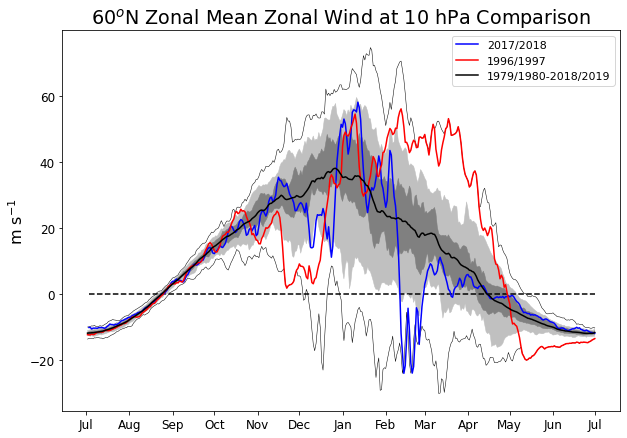

<Figure size 432x288 with 0 Axes>

In [11]:
#SSW event
ds1 = xr.open_dataset("/erai/"+str(2017)+"/u."+str(2017)+".nc",decode_times=False)
ds2 = xr.open_dataset("/erai/"+str(2018)+"/u."+str(2018)+".nc",decode_times=False)
year1 = [x for x in range(728,len(np.array(ds1.isel(lev=31).u))-4,4)]#July 1 to the end
year2 = [x for x in range(0,728,4)] #first to july first

values1 = []
date1 = []
for j in range(len(year1)):
    dt = year1[j]/4 + 1
    date1.append(dt)
    dayavg = yr1daily_avg(year1[j])
    values1.append(dayavg)

for k in range(len(year2)):
    dt = year2[k]/4 + 1
    date1.append(dt)
    dayavg = yr2daily_avg(year2[k])
    values1.append(dayavg)  
    
#Vortice event
ds3 = xr.open_dataset("/erai/"+str(1996)+"/u."+str(1996)+".nc",decode_times=False)
ds4 = xr.open_dataset("/erai/"+str(1997)+"/u."+str(1997)+".nc",decode_times=False)
year3 = [x for x in range(728,len(np.array(ds3.isel(lev=31).u))-4,4)]#July 1 to the end
year4 = [x for x in range(0,728,4)] #first to july first

values2 = []
date2 = []
for l in range(len(year3)):
    dt = year3[l]/4 + 1
    date2.append(dt)
    dayavg = yr3daily_avg(year3[l])
    values2.append(dayavg)

for m in range(len(year4)):
    dt = year4[m]/4 + 1
    date2.append(dt)
    dayavg = yr4daily_avg(year4[m])
    values2.append(dayavg)
    
###begin plot
#establish time data for means of months on x-axis
base = datetime.datetime(2017,7,1,0,0)
date_list1 = [base - datetime.timedelta(days=x) for x in range(0, len(date1))]
date_list2 = [base - datetime.timedelta(days=x) for x in range(0, len(date2))]
date_list3 = [base - datetime.timedelta(days=x) for x in range(0, len(full_mean))]
    
date_list1 = date_list1[::-1]
date_list2 = date_list2[::-1]
date_list3 = date_list3[::-1]
    
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
    
plt.figure(figsize = (10,7))
matplotlib.rcParams.update({'font.size': 16})
plt.title ("60$^o$N Zonal Mean Zonal Wind at 10 hPa Comparison")
#quantile plots
plt.plot(date_list3,mx,color = "black", linewidth=0.5)
plt.plot(date_list3,q90,color = "silver", linewidth=0.5)
plt.plot(date_list3,q70,color = "grey", linewidth=0.5)
plt.plot(date_list3,q30,color = "grey", linewidth=0.5)
plt.plot(date_list3,q10,color = "silver", linewidth=0.5)
plt.plot(date_list3,mn,color = "black", linewidth=0.5)
    
plt.fill_between(date_list3,q90,q10,facecolor="silver")
plt.fill_between(date_list3,q70,q30,facecolor="gray")
#reg value plots
plt.plot(date_list1,values1,color = "blue",label ="2017/2018")
plt.plot(date_list2,values2,color = "red",label ="1996/1997")
plt.plot(date_list3,full_mean,color = "black", label = "1979/1980-2018/2019")
plt.hlines(0, date_list1[0],date_list1[-1], colors='k', linestyles='dashed')
plt.legend(prop={'size': 11})
plt.ylabel("m s$^{-1}$")
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter 
X.set_major_formatter(fmt)
    
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

plt.savefig('/home11/grad/2020/ef935217/Research/10hPa_WindTimeseries/Test_Images/Compare_SSW.png',format='png')

plt.show()
plt.clf()